
--- N225 from Fred ---
            NIKKEI225
DATE                 
1949-05-16     176.21

--- N225 from yahoo ---
              Open    High     Low   Close  Volume  Adj Close
Date                                                         
1984-01-04  9927.0  9927.0  9927.0  9927.0       0     9927.0

--- N225 from yahoo ---


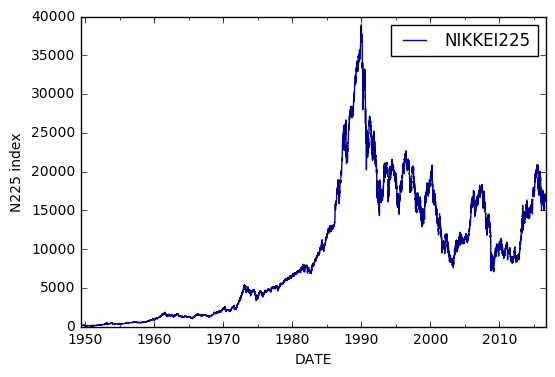

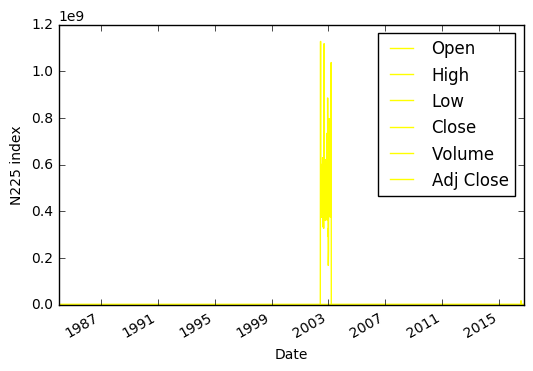

In [31]:
import pandas_datareader.data as pdr

start = "1949/5/6"
end = "2016/9/30"

# pandas_datareaderを使って、fredからNIKKEI225のデータを読み込み
N225 = pdr.DataReader("NIKKEI225", 'fred', start, end)

# pandas_datareaderを使って、yahooからNIKKEI225のデータを読み込み
price = pdr.DataReader("^N225", 'yahoo', start, end)

print('\n--- N225 from Fred ---')
print(N225.head(1))

print('\n--- N225 from yahoo ---')
print(price.head(1))

'''
[%]または[%%]で始まるコマンドをマジックコマンドと呼ぶ。
  - [%]  以降1行の内容を引数としてコマンドに渡す。
  - [%%] 複数行をコマンドに渡す。
'''
# jupyter notebook上でmatplotlibを使ったグラフをインライン表示したいためマジックコマンドを設定
%matplotlib inline

print('\n--- N225 from yahoo ---')
import matplotlib.pyplot as plt
N225.plot(color="darkblue")
plt.ylabel('N225 index')

price.plot(color='yellow')
plt.ylabel('N225 index')



-- 日経平均 -- 
                    Open          High           Low         Close  Volume  \
Date                                                                         
2000-01-04  18937.449219  19187.609375  18937.449219  19002.859375       0   
2000-01-05  19003.509766  19003.509766  18221.820312  18542.550781       0   
2000-01-06  18574.009766  18582.740234  18168.269531  18168.269531       0   
2000-01-07  18194.050781  18285.730469  18068.099609  18193.410156       0   
2000-01-11  18246.099609  18887.560547  18246.099609  18850.919922       0   

               Adj Close  
Date                      
2000-01-04  19002.859375  
2000-01-05  18542.550781  
2000-01-06  18168.269531  
2000-01-07  18193.410156  
2000-01-11  18850.919922  

-- ドル円為替レート -- 
            DEXJPUS
DATE               
2000-01-03   101.70
2000-01-04   103.09
2000-01-05   103.77
2000-01-06   105.19
2000-01-07   105.17

-- pd.concat -- 
                   Close  DEXJPUS
2000-01-04  19002.859375   103.09
2000-01-

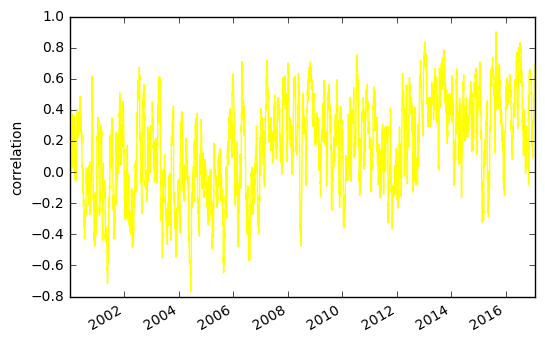

In [21]:
#  Pandas : データベースライブラリ
import pandas_datareader.data as pdr
import pandas as pd
start = "2000/1/1"
end = "2017/1/31"

#  米国ヤフーファイナンスから、日経平均株価のデータ取得
price = pdr.DataReader("^N225", 'yahoo', start, end)
print ("\n-- 日経平均 -- ")
print (price.head())

#  ドル円の為替レートを取得 「DEXJPUS」はfredのドル円のレートの指定コード
fx = pdr.DataReader('DEXJPUS', "fred", start, end)
print ("\n-- ドル円為替レート -- ")
print (fx.head())

#  日経平均の終値と、ドル円の為替レートの表を作る。
#  dropna() : どちらかに空のレコードが有ればその業は削除
port = pd.concat([price.Close, fx], axis=1).dropna()
print ("\n-- pd.concat -- ")
print (port.head())

#  日経平均の終値価格を変化率に変換
n = port.Close.pct_change().dropna()
print ("\n-- Close.pct_change -- ")
print (n.head())

#  為替レートの価格を変化率に変換
f = port.DEXJPUS.pct_change().dropna()
print ("\n-- DEXJPUS.pct_change -- ")
print (f.head())

#  Matplotlib : 描画ライブラリ
%matplotlib inline
import matplotlib.pyplot as plt

#  20日の移動相関を計算し、グラフに表示。
f.rolling(window=20).corr(n).plot(color="yellow")
plt.ylabel('correlation')
